In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")

In [3]:
orders.head(), orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


(                           order_id                       customer_id  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
 3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
 4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
 
   order_status order_purchase_timestamp    order_approved_at  \
 0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
 1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
 2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
 3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
 4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
 
   order_delivered_carrier_date order_delivered_customer_date  \
 0          2017-10-04 19:55:00           2017-10-10 21:25:13   
 1          2018-07-26 14:31:00 

In [4]:
items.head(), items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


(                           order_id  order_item_id  \
 0  00010242fe8c5a6d1ba2dd792cb16214              1   
 1  00018f77f2f0320c557190d7a144bdd3              1   
 2  000229ec398224ef6ca0657da4fc703e              1   
 3  00024acbcdf0a6daa1e931b038114c75              1   
 4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
 
                          product_id                         seller_id  \
 0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
 1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
 2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
 3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
 4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
 
    shipping_limit_date   price  freight_value  
 0  2017-09-19 09:45:35   58.90          13.29  
 1  2017-05-03 11:05:13  239.90          19.93  
 2  2018-01-18 14:48:30  199.00          17.87  
 3  2018-08-15 10:10:18   

In [5]:
items.head(), items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


(                           order_id  order_item_id  \
 0  00010242fe8c5a6d1ba2dd792cb16214              1   
 1  00018f77f2f0320c557190d7a144bdd3              1   
 2  000229ec398224ef6ca0657da4fc703e              1   
 3  00024acbcdf0a6daa1e931b038114c75              1   
 4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
 
                          product_id                         seller_id  \
 0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
 1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
 2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
 3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
 4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
 
    shipping_limit_date   price  freight_value  
 0  2017-09-19 09:45:35   58.90          13.29  
 1  2017-05-03 11:05:13  239.90          19.93  
 2  2018-01-18 14:48:30  199.00          17.87  
 3  2018-08-15 10:10:18   

In [33]:
df = orders.merge(items, on="order_id", how="inner")
df = df.merge(products, on="product_id", how="inner")

In [7]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [34]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

In [35]:
df["tempo_entrega"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.days

In [36]:
df["atraso"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).dt.days

In [37]:
df["volume"] = (
    df["product_length_cm"] *
    df["product_height_cm"] *
    df["product_width_cm"]
)

In [38]:
df["frete_relativo"] = df["freight_value"] / df["price"]

In [13]:
df.drop_duplicates(inplace=True)

In [39]:
df = df.dropna(subset=["order_delivered_customer_date"])

In [40]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        1
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1537
product_name_lenght              1537
product_description_lenght       1537
product_photos_qty               1537
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
tempo_entrega                       0
atraso                              0
volume                             18
frete_relativo                      0
dtype: int64

In [41]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        1
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1537
product_name_lenght              1537
product_description_lenght       1537
product_photos_qty               1537
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
tempo_entrega                       0
atraso                              0
volume                             18
frete_relativo                      0
dtype: int64

In [17]:
df = df[~df["order_delivered_customer_date"].isna()]

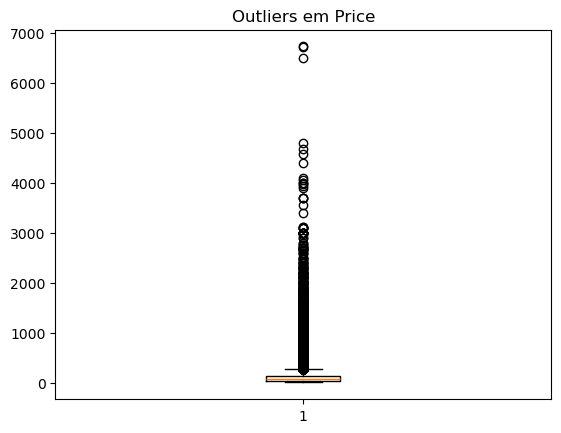

In [18]:
plt.boxplot(df["price"].dropna())
plt.title("Outliers em Price")
plt.show()

In [19]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df = df[(df["price"] >= lim_inf) & (df["price"] <= lim_sup)]

In [20]:
scaler_minmax = MinMaxScaler()
scaler_z = StandardScaler()

df["price_norm"] = scaler_minmax.fit_transform(df[["price"]])
df["freight_z"] = scaler_z.fit_transform(df[["freight_value"]])

In [21]:
df = pd.get_dummies(df, columns=["product_category_name"], drop_first=True)

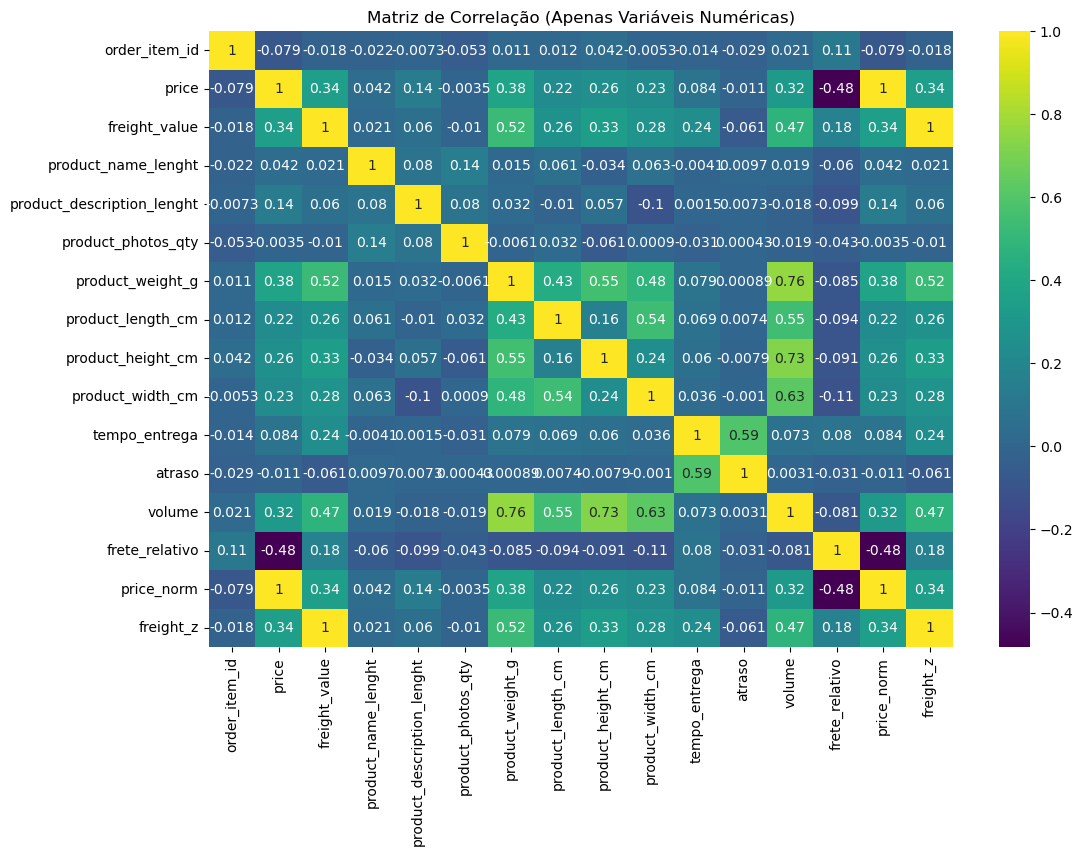

In [23]:
plt.figure(figsize=(12,8))

df_corr = df.select_dtypes(include=['number']).corr()

sns.heatmap(df_corr, cmap="viridis", annot=True)
plt.title("Matriz de Correlação (Apenas Variáveis Numéricas)")
plt.show()

In [43]:
num_cols = [
    "price",
    "freight_value",
    "volume",
    "tempo_entrega",
    "atraso",
    "frete_relativo"
]

In [44]:
cat_cols = ["product_category_name"]

In [45]:
df[cat_cols].head()

,product_category_name
0,utilidades_domesticas
1,perfumaria
2,automotivo
3,pet_shop
4,papelaria


In [25]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [47]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [48]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols)
    ]
)

In [49]:
df_tratado = preprocess.fit_transform(df)

In [50]:
df_tratado = pd.DataFrame(df_tratado)

In [52]:
df.to_csv("olist_tratado_final.csv", index=False)